Số ảnh hợp lệ: 708
Ảnh thiếu label: []
Kích thước tensor của ảnh sau khi resize: torch.Size([3, 1280, 1280])


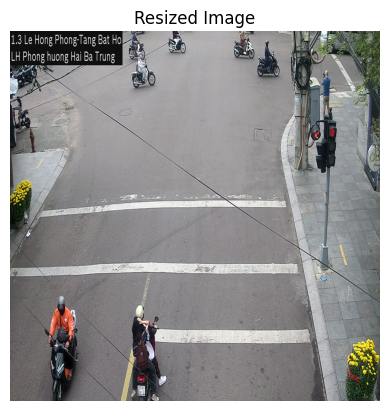

In [3]:
import os
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms

def validate_dataset(image_dir, label_dir, image_exts=('.jpg', '.jpeg', '.png')):
    """
    Duyệt qua các file ảnh trong image_dir và kiểm tra sự tồn tại của file label tương ứng trong label_dir.

    Trả về:
      - valid_images: danh sách file ảnh có annotation hợp lệ.
      - missing_labels: danh sách file ảnh thiếu annotation.
    """
    valid_images = []
    missing_labels = []
    image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(image_exts)]

    for image_file in image_files:
        base_name = os.path.splitext(image_file)[0]
        label_path = os.path.join(label_dir, base_name + '.txt')
        if os.path.exists(label_path):
            valid_images.append(image_file)
        else:
            missing_labels.append(image_file)

    return valid_images, missing_labels

def resize_image(image, size=(1280,1280)):
    """
    Resize ảnh về kích thước cố định và chuyển đổi ảnh sang tensor.

    Parameters:
      - image: đối tượng PIL Image.
      - size: kích thước mong muốn (width, height), mặc định (512,512).

    Trả về:
      - image_tensor: ảnh đã resize dưới dạng tensor (giá trị pixel trong [0,1]).
    """
    resized_img = image.resize(size)
    transform = transforms.ToTensor()
    image_tensor = transform(resized_img)
    return image_tensor

if __name__ == '__main__':
    image_dir = "/content/drive/MyDrive/AIP491/Datasets/Data_no_helmet_only_0213/train/images"
    label_dir = "/content/drive/MyDrive/AIP491/Datasets/Data_no_helmet_only_0213/train/labels"

    valid_images, missing_labels = validate_dataset(image_dir, label_dir)
    print("Số ảnh hợp lệ:", len(valid_images))
    print("Ảnh thiếu label:", missing_labels)

    if valid_images:
        sample_path = os.path.join(image_dir, valid_images[0])
        img = Image.open(sample_path).convert("RGB")

        img_tensor = resize_image(img, size=(1280,1280))
        print("Kích thước tensor của ảnh sau khi resize:", img_tensor.shape)

        img_np = img_tensor.permute(1, 2, 0).numpy()
        plt.imshow(img_np)
        plt.title("Resized Image")
        plt.axis('off')
        plt.show()
